In [ ]:
from my_ai_utils import *

In [ ]:
df = pd.read_csv("iris.data.csv", header=None, names=['sepal_length', 'sepal_width',
                                          'petal_length', 'petal_width', 'category'])
df.describe()

In [ ]:
real_set = np.array(df)
size = len(real_set)
for e in range(0, 2):
    for j in range(1, 4):
        if e != j:
            category1 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-setosa"])
            category2 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-versicolor"])
            category3 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-virginica"])

            f = plt.figure()
            plt.plot(category1[:, 0], category1[:, 1], '+')
            plt.plot(category2[:, 0], category2[:, 1], 'o')
            plt.plot(category3[:, 0], category3[:, 1], '*')

            f.show()


In [ ]:
real_set = np.array(pd.read_csv("iris.data.csv"))
np.random.shuffle(real_set)

size = len(real_set)
X_set = real_set[:,:-1]
Y_set = real_set[:,-1]
X_set = np.hstack((X_set, np.ones(len(Y_set)).reshape((-1, 1))))

_train_set = X_set[:size//2, :]
_train_y = Y_set[:size//2]

_test_set = X_set[size//2: , :]
_test_y = Y_set[size//2:]


iris_model = NetModel(input_shape=(4, ), usage="MultiClassification")
iris_model.add_layer(Dense(4, activation_function="sigmoid"))

iris_model.compile(3, categories=['Iris-setosa','Iris-versicolor', 'Iris-virginica'])

iris_model.train(_train_set, _train_y,"cross_entropy", nepochs= 500, learning_rate=0.01)
iris_model.display_losses()
z = iris_model.predict_sample(_test_set,_test_y )

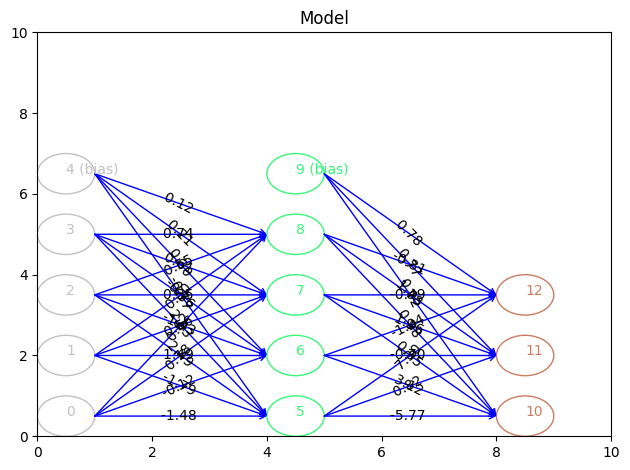

 
Your model accuracy is  98.66666666666667% on this dataset 
 


In [55]:
best_model = load("98accuratefinal")
best_model.draw()
a = best_model.predict_sample(_test_set,_test_y )